# Chapter 7 - Well-Known Continuous Distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, gamma

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Continuous Uniform Distribution

> The probability density function of the **continuous uniform random variable** $X$ on the interval $[A,B]$ where every outcomes in that interval are *equally likely* to occur is
> $$ 
f(x;\ A,B) = \begin{cases}
    \frac{1}{B - A} &\text{if } A \le x \le B \\
    0               &\text{otherwise}
\end{cases}
$$
‎  

The density function forms a rectangle shaped graph of whose base width is $B - A$ and **constant height** of $\frac{1}{B - A}$ making the total area under the density function equal to 1 (so it is a valid pdf). Do note that the interval $[A,B]$ may not always be closed, a fully opened or half opened interval can also be the domain of an uniform distribution as well.

<span style="color: green;"><b><u>Example</u></b></span> Suppose that a large conference room at a certain company can be reserved for no
more than 4 hours. Both long and short conferences occur quite often. In fact, it can be assumed that the length $X$ of a conference has a uniform distribution on the interval $[0,4]$.

The appropriate density function for the uniformly distributed random variable $X$ in this situation is

$$
f(x;\ 0,4) = \begin{cases}
    1/4 &\text{if } 0 \le x \le 4 \\
    0   &\text{otherwise}
\end{cases}
$$

For an example, if we wish to calculate the probability that any given conference lasts at least 3 hours, we calculate

$$
P(X \ge 3) = \int_3^4 f(x;\ 0,4)\ dx = \int_3^4 \frac{1}{4}\ dx = \frac{1}{4}.
$$

Text(0.3, 0.26, 'area from 3 to 4 = 1/4')

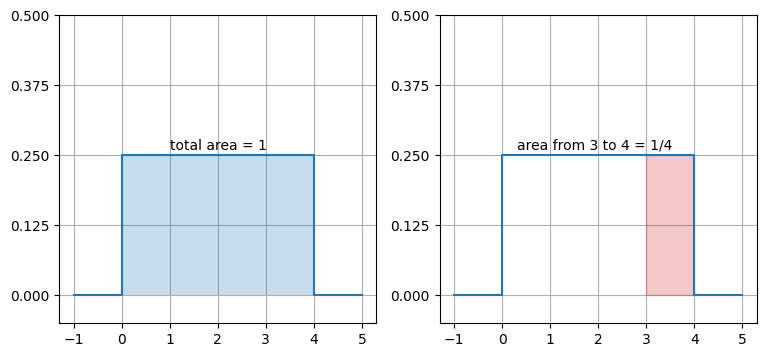

In [2]:
fig, axs = plt.subplots(1,2,figsize=(9,4))

for ax in axs:
    ax.plot([-1,0,0,4,4,5], [0,0,1/4,1/4,0,0])
    ax.set(
        ylim=[-.05,0.5], yticks=np.linspace(0,0.5,5),
        axisbelow=True
    )
    ax.grid();
    
axs[0].fill_between([0,4], [0,0], [1/4,1/4], alpha=0.25)
axs[0].text(1, 0.26, "total area = 1")

axs[1].fill_between([3,4], [0,0], [1/4,1/4], alpha=0.25, color='tab:red')
axs[1].text(0.3, 0.26, "area from 3 to 4 = 1/4")

---
<h3 style="color: green; font-size: 16pt;">Expected Value & Variance of Continuous Uniform Distribution</h3>

The the formula for the expected value and variance of a uniformly distributed continuous rv can be easily derived form the definitions, consider

$$
\begin{align*}
E(X) = \int_{-\infty}^{\infty} xf(x;\ A,B)\ dx &= \int_{A}^{B} \frac{x}{B - A}\ dx \\ \\
&= \frac{1}{2(B - A)}\left[ x^2 \right]_A^B \\ \\
&= \frac{B^2 - A^2}{2(B-A)} \\ \\
&= \frac{A + B}{2}
\end{align*}
$$

So the expected value of $X$ is just the average of $A$ and $B$. And

$$
\begin{align*}
\sigma^2 = E(X^2) - [E(X)]^2 &= \int_A^B \frac{x^2}{B-A}\ dx - \left( \frac{A+B}{2} \right)^2 \\ \\
&= \frac{1}{3(B-A)}[x^3]_A^B - \frac{(A+B)^2}{4} \\ \\
&= \frac{A^2 + AB + B^2}{3} - \frac{A^2 + 2AB + B^2}{4} \\ \\
&= \frac{A^2 - 2AB + B^2}{12} = \frac{(A-B)^2}{12}
\end{align*}
$$

> The mean and variance of the uniform distribution are
> $$ \mu = \frac{A+B}{2} \quad\text{and}\quad \sigma^2 = \frac{(A-B)^2}{12}. $$

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Normal Distribution

The most important probability distribution in the entire field of probability and statistics is the **normal distribution**. Its graph, called the **normal curve**, is the symmetrical *bell-shaped curve*  which approximately describes many numerical populations have distributions that can be fit very closely by an appropriate normal curve. Examples include heights, weights, and other physical characteristics, measurement errors in scientific experiments, anthropometric measurements on fossils, reaction times in psychological experiments, measurements of intelligence (IQ) and aptitude, scores on various tests, and numerous economic measures and indicators. 

In addition, even when individual variables themselves are not normally distributed, sums and averages of the variables
will under suitable conditions have approximately a normal distribution; this is the
content of *the Central Limit Theorem* discussed in the next chapter.

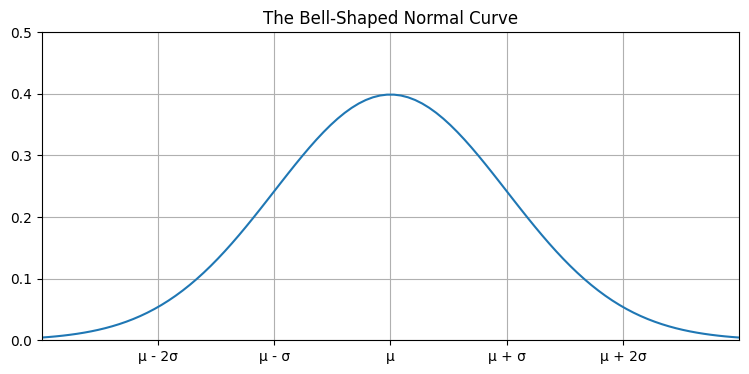

In [3]:
fig, ax = plt.subplots(1,1,figsize=(9,4))

xs = np.linspace(-3,3,100)

ax.plot(xs, norm.pdf(xs));
ax.set(
    ylim=[0,0.5], xlim=[-3,3],
    xticks=[-2,-1,0,1,2], xticklabels=["μ - 2σ", "μ - σ", "μ", "μ + σ", "μ + 2σ"],
    axisbelow=True,
    title="The Bell-Shaped Normal Curve"
)
ax.grid();

> A continuous random variable $X$ is said to be a normally distributed rv if its pdf is a **normal distribution** (also called **Gaussian distribution**) with the parameters $\mu$ and $\sigma$ (sometimes $\sigma^2$) given by
> $$ \begin{align*} 
N(x;\ \mu, \sigma) &= \frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}} \\
&= \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) \quad\text{for } x \in \mathbb{R}
\end{align*}
$$
> where $\mu \in \mathbb{R}$ and $\sigma > 0$ is the mean and the standard deviation of $X$ respectively.

The normal curve is completely determined by the two parameter, the mean $\mu$ which tells where the bell curve is centered at, and the standard deviation $\sigma$ (or the variance $\sigma^2$) which determines how spread out from the mean the bell curve is (or just how wide it is). 

---
<h3 style="color: green; font-size: 16pt;">A Proof That Normal Curve is a Valid Probability Distribution (Optional)</h3>

Clearly $N(x;\ \mu, \sigma) > 0$ for all value of $X$, but a somewhat complicated calculus argument must be used to verify that the total probability, that is, the area under the graph is equal to 1. To illustrate this, consider

$$
I = \int_{-\infty}^{\infty} N(x;\ \mu, \sigma)\ dx = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }\ dx
$$

The goal is to proof that $I = 1$ for any value $\mu \in \mathbb{R}$ and $\sigma > 0$ so the normal distribution is a valid probability distribution, the integral is not possible to solve by any standard methods, but there is a trick to transform this integral into a solvable one. First consider

$$
I^2 = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\ dx \cdot \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\ dx
$$

Now $x$ in the integral is just a dummy variable, we can replace $x$ in the second integral with other symbol such as $y$:

$$
\begin{align*}
I^2 &= \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\ dx \cdot \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right)\ dy \\ \\
&= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) \cdot \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right)\ dxdy \\ \\
&= \frac{1}{2\pi\sigma^2}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \exp\left( -\frac{(x-\mu)^2 + (y-\mu)^2}{2\sigma^2} \right)\ dxdy \\ \\
\end{align*}
$$

Let's make some substitution, let $u = x - \mu$ and $v = y - \mu$ such that $du = dx$ and $dv = dy$, so

$$
\begin{align*}
I^2 &= \frac{1}{2\pi\sigma^2}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \exp\left( -\frac{u^2 + v^2}{2\sigma^2} \right)\ dudv \\ \\
\end{align*}
$$

Notice that the term $u^2 + v^2$ can be interpreted as the squared distance $r^2$ in the polar coordinate system, so we can convert this integral into the polar coordinate form as follows.

$$
\begin{align*}
I^2 &= \frac{1}{2\pi\sigma^2}\int_{0}^{2\pi}\int_{0}^{\infty} \exp\left( -\frac{r^2}{2\sigma^2} \right) \cdot r\ drd\theta \\ \\
\end{align*}
$$

Now we make the last substitution, let $z = e^{-r^2/(2\sigma^2)}$ such that $dz = -\frac{r}{\sigma^2} e^{-r^2/(2\sigma^2)}\ dr$ and when $r = 0 \to z = 1$, $r = \infty \to z = 0$, so

$$
\begin{align*}
I^2 &= \frac{1}{2\pi\sigma^2}\int_{0}^{2\pi}\int_{1}^{0} -\sigma^2\ drd\theta = \frac{1}{2\pi}\int_{0}^{2\pi}\int_{0}^{1} 1\ drd\theta \\ \\
&= \frac{1}{2\pi} \int_{0}^{2\pi} 1\ d\theta \\ \\
&= \frac{1}{2\pi} \cdot 2\pi = 1.
\end{align*}
$$

We have arrived at the result $I^2 = 1$ which implies $I = \pm1$ but since the function is positive over the real line, it is impossible for the integral to be negative. Hence, $I = 1$ and we can conclude that the normal distribution is a valid probability distribution function.

---
<h3 style="color: green; font-size: 16pt;">The Standard Normal Distribution</h3>

The computation of $P(a \le X \le b)$ when $X$ is a normal rv with parameters $\mu$ and $\sigma$ requires evaluating

$$
P(a \le X \le b) = \int_a^b \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)\ dx
$$

As we see from the previous section that none of the standard integration techniques can be used to accomplish this. Instead, for $\mu = 0$ and $\sigma = 1$, The value of $P(a \le X \le b)$ has been calculated using numerical techniques and tabulated in many books and software for certain values of $a$ and $b$. This table can also be used to compute probabilities for any other values of $\mu$ and $\sigma$ under consideration.

> The normal distribution with parameter values $\mu = 0$ and $\sigma = 1$ is called the **standard normal distribution**. A random variable having a standard normal distribution is called a **standard normal random variable** and will be denoted by $Z$. The pdf of $Z$ is given by
> $$ N(z;\ 0, 1) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}, \quad\text{for } z \in \mathbb{R}. $$


> The graph of $N(z;\ 0,1)$ is called the **standard normal curve** or the **$z$-curve**. The cdf of standard normal rv $Z$ is
> $$ P(Z \le z) = \Phi(z) = \int_{-\infty}^z N(y;\ 0, 1)\ dy $$

The values of $P(Z \le z) = \Phi(z)$ for various values of $z$ are often pre-calculated by statistical software and tabulated in most of statistics related books, this can significantly reduce the size of table and useful for calculating the area under any normal curves, not just standard one, ny transforming them into the standard normal curve. (For an example table, see [STANDARD NORMAL DISTRIBUTION: Table](https://math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).)

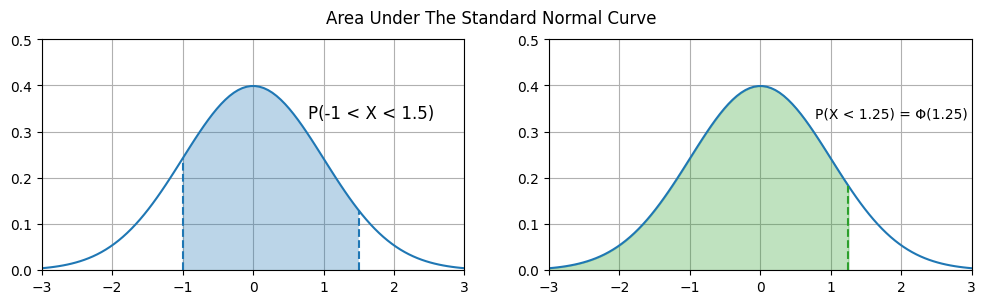

In [4]:
fig, axs = plt.subplots(1,2,figsize=(12,3))

xs = np.linspace(-3,3,100)

for ax in axs:
    ax.plot(xs, norm.pdf(xs))
    ax.set(axisbelow=True, ylim=[0,0.5], xlim=[-3,3])
    ax.grid()

xs = np.linspace(-1,1.5,100)
axs[0].plot([-1,-1,np.nan,1.5,1.5], [0,norm.pdf(-1),np.nan,0,norm.pdf(1.5)], color='tab:blue', linestyle='--')
axs[0].fill_between(xs, xs * 0, norm.pdf(xs), alpha=0.3)
axs[0].text(0.78, 0.33, "P(-1 < X < 1.5)", fontsize=12)

xs = np.linspace(-3,1.25,100)
axs[1].plot([1.25,1.25], [0,norm.pdf(1.25)], color='tab:green', linestyle='--')
axs[1].fill_between(xs, xs * 0, norm.pdf(xs), alpha=0.3, color='tab:green')
axs[1].text(0.78, 0.33, "P(X < 1.25) = Φ(1.25)", fontsize=10)

fig.suptitle("Area Under The Standard Normal Curve");

<span style="color: green;"><b><u>Example</u></b></span> For examples, let's calculate (a) $P(Z \le 1.25),$ (b) $P(Z > 3.14),$ (c) $P(-1.2 \le Z < 2.01),$ and (d) $P(Z < 1.32 \text{ or } Z > 0.55)$ for $Z$ being a standard normal rv.

(a) Refer to the table of cdf, we can directly read

$$
P(X \le 1.25) = \Phi(1.25) = 0.89435.
$$

(b) We can see that $P(Z > 3.14) = 1 - P(Z \le 3.14)$ and refer to the table again, we have

$$
P(Z > 3.14) = 1 - \Phi(3.14) = 1 - 0.99916 = 0.00084.
$$

(c) To calculate $P(-1.2 \le Z < 2.01)$, consider

$$
\begin{align*}
P(-1.2 \le Z < 2.01) = \Phi(2.01) - \Phi(-1.2) &= 0.97778 - 0.11507 \\ 
&= 0.86271.
\end{align*}
$$

(d) To calculate $P(Z < 1.32 \text{ or } Z > 0.55)$, consider

$$
\begin{align*}
P(Z < 0.55 \text{ or } Z > 1.32) = P(Z < 0.55) + P(Z > 1.32) &= \Phi(0.55) + 1 - \Phi(1.32) \\
&= 0.70884 + 1 - 0.90658 \\
&= 0.80226.
\end{align*}
$$

---
<h3 style="color: green; font-size: 16pt;">Nonstandard Normal Distributions</h3>

When $X$ is a normally distributed random variable that is nonstandard, probabilities involving $X$ are computed by **"standardizing"** $X$ in to the **standardized variable**.

> If $X$ has a normal distribution with mean $\mu$ and standard deviation $\sigma$, then
> $$ Z = \frac{X - \mu}{\sigma} $$
> has a **standard normal distribution** for any $\mu\in\mathbb{R}$ and $\sigma > 0$. Thus
> $$ P(a \le X \le b) = P\left( \frac{a - \mu}{\sigma} \le Z \le \frac{b - \mu}{\sigma} \right). $$

The key idea of the proposition is that by standardizing, any probability involving $X$ can be expressed as a probability involving a standard normal rv $Z$, so that the pre-computed table can be used to calculate probability for any normal distribution.

<span style="color: green;"><b><u>Example</u></b></span> A certain type of storage battery lasts, on average, 3.0 years with a standard
deviation of 0.5 year. Assuming that battery life is normally distributed, find the probability that a given battery will last less than 2.3 years.

Let a rv $X$ represent the battery life, so $X$ is a normal rv with pdf given by $N(x;\ 3, 0.5)$. If we want to calculate $P(X < 2.3)$, we first needed to standardize $X$ so when $x = 2.3$, we get

$$
z = \frac{2.3 - 3}{0.5} = -1.4
$$

and then using the cdf table, we get

$$
P(X < 2.3) = P(Z < -1.4) = 0.08076 = 8\%.
$$

<span style="color: green;"><b><u>Example</u></b></span> The article "Fast-Rise Brake Lamp as a Collision-Prevention Device" (Ergonomics, 1993: 391–395) suggests that reaction time for an in-traffic response to a brake signal from standard brake lights can be modeled with a normal distribution having mean value 1.25 sec and standard deviation of .46 sec. What is the probability that reaction time is between 1.00 sec and 1.75 sec?

If we let $X$ denote reaction time, then standardizing gives

$$
1.00 \le X \le 1.75 \iff \frac{1.00 - 1.25}{0.46} \le \frac{X - 1.25}{0.46} = Z \le \frac{1.75 - 1.25}{0.46}.
$$

Thus

$$
\begin{align*}
P(1.00 \le X \le 1.75) &= P\left(\frac{1.00 - 1.25}{0.46} \le Z \le \frac{1.75 - 1.25}{0.46} \right) \\
&= P(-0.54 \le Z \le 1.09) \\
&= P(Z \le 1.09) - P(Z \le -0.54) \\
&= 0.86214 - 0.29460 = 0.56754.
\end{align*}
$$

---
<h3 style="color: green; font-size: 16pt;">Z-Score and the Empirical Rule</h3>

> The standardized value $(x - \mu)/\sigma$ is called the **z-score** of $x$ which equals to the distance between $x$ and the mean $\mu$ as multiples of standard deviation $\sigma$.
> $$ z = \frac{x - \mu}{\sigma} \iff x - \mu = z\sigma$$

For an example, if $X$ is a normal rv with pdf $N(x;\ 3, 0.25)$ then the value $x_1 = 1.25$ with z-score

$$
z_1 = \frac{1.25 - 3}{0.25} = -7
$$

which tells that 1.25 is at the distance 7 standard deviations to the left of the mean ($\mu = 3$). For another example, consider $x_2 = 3.15$ with z-score

$$
z_2 = \frac{3.25 - 3}{0.25} = 0.6
$$

which implies that 3.15 is 0.6 standard deviations above the mean. 

<h4 style="color: green;">The Empirical Rule (68-95-99.7 Rule)</h4>

> If the population distribution of a variable is (approximately) normal, then
> 1. Roughly 68% of the values are within 1 SD of the mean.
> 2. Roughly 95% of the values are within 2 SDs of the mean.
> 3. Roughly 99.7% of the values are within 3 SDs of the mean.

For an example, if $X$ is a normal rv with pdf $N(x;\ 3, 0.25)$ then 95% of the value of $X$ falls between

$$
[\mu - 2\sigma, \mu + 2\sigma] = [3 - 0.5, 3 + 0.5] = [2.5, 3.5].
$$

that is $P(2.5 \le X \le 3.5) \approx 0.95.$

---
<h3 style="color: green; font-size: 16pt;">Percentiles of Normal Distributions</h3>

For any $0 \le p \le 1$, the ($100p$)th percentile of the *standard* normal distribution can be found using the cumulative distribution table. Since the ($100p$)th percentile of $Z$ corresponds to the value $z$ for which $100p$% of the value of $Z$ falls below $z$, the value of $z$ can be found at the head of the table where the cell containing $p$ is at.

For example, the 75th percentile of the standard normal rv $Z$ can be found by finding the cell in the table where the cdf of $Z$ is 0.75 (or approximately 0.75), from the given table, the closest value is 0.74857 which corresponds to the $z$ value of 0.67. Thus, the 75th percentile of $Z$ is about 0.67.

For other nonstandard normal distributions, we can used standardization to find the ($100p$)th percentile.

> For any $0 \le p \le 1$, the ($100p$)th percentile of a rv $X$ with normal distribution $N(x;\ \mu, \sigma)$ is
> $$ x_p =  \mu + \sigma z_p $$
> where $x_p$ and $z_p$ is the ($100p$)th percentile of $X$ and the standard normal rv $Z$, respectively.

<span style="color: green;"><b><u>Example</u></b></span> The amount of distilled water dispensed by a certain machine is normally distributed
with mean value 64 oz and standard deviation .78 oz. What container size $c$ will ensure that overflow occurs only .5% of the time?

If $X$ is a rv representing the amount of water dispensed in oz, then the pdf of $X$ is $N(x;\ 64, 0.78)$. We want ti find the value $c$ such that

$$
P(X > c) = 1 - P(X \le c) =  0.005 \iff P(X \le c) = 0.995
$$

or equivalently, we need the find the value of $99.5$th percentile of $X$. So first we find the $99.5$th percentile of the standard normal rv $Z$, from the table, that value is approximately $z_p = 2.58$, so we have

$$
c = 64 + 0.78(2.58) = 66.0124 \text{ oz}.
$$

---
<h3 style="color: green; font-size: 16pt;">Normal Approximation to the Binomial</h3>

Recall that the mean value and standard deviation of a binomial random variable $X$ are $\mu_X = np$ and $\sigma_X = \sqrt{np(1-p)}$ respectively. The figure below shows a binomial probability histogram for a binomial distribution $b(x;\ 20, 0.6)$, for which $\mu_X = 12$ and $\sigma_X = 2.19$, and a normal curve with the same $\mu$ and $\sigma$ values. We can see that the normal curve has been superimposed on the probability histogram. Although the probability histogram is a bit skewed, the normal curve gives a very good approximation.

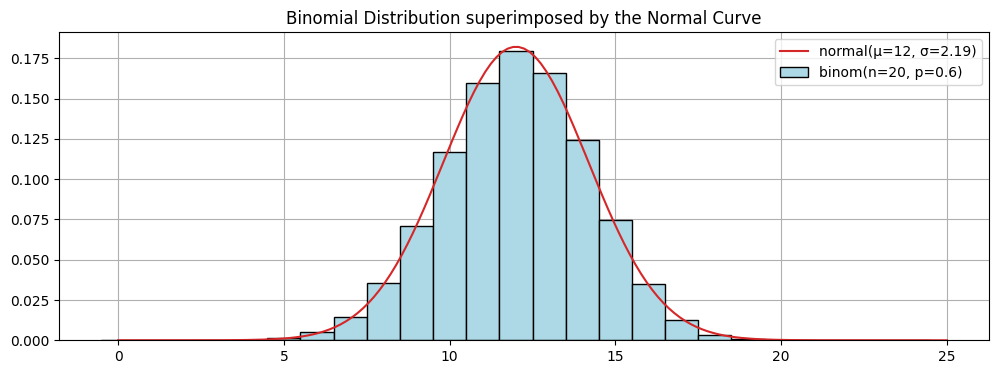

In [5]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

xs = np.arange(0,25)
XS = np.linspace(0,25,150)

ax.bar(
    xs, binom.pmf(xs, 20, 0.6), width=1,
    color='lightblue', edgecolor='k',
    label="binom(n=20, p=0.6)"
)
ax.plot(
    XS, norm.pdf(XS, 12, 2.19), color='tab:red',
    label="normal(μ=12, σ=2.19)"
)
ax.set(title="Binomial Distribution superimposed by the Normal Curve", axisbelow=True)
ax.grid(); ax.legend();

> If $X$ is a **binomial** random variable with mean $\mu = np$ and variance $\sigma^2 = np(1-p)$, then the limiting form of the distribution of
> $$ Z = \frac{X - np}{\sqrt{np(1-p)}} $$
> as $n\to\infty$, is the **standard normal** distribution $N(z;\ 0, 1)$. 

In practice, the approximation is adequate provided that $n$ is large and $p$ is not very extreme (not absurdly close to 0 or 1). The approximation is also fairly accurate for small value of $n$ when $p$ is reasonably close to 1/2 (to ensure symmetrical.)

We can approximate the probability related to binomial distribution using normal distribution as follows. Suppose $X$ is a binomial rv with distribution $B(x;\ n, p)$, then

$$
P(X \le x) = P\left( Z \le \frac{(x + .5) - np}{\sqrt{np(1-p)}} \right)
$$

that is

$$
\begin{align*}
P(X \le x) &= (\text{area under } N(y;\ \mu, \sigma) \text{ to the left of } y = x + 0.5) \\ \\
&= \Phi\left( \frac{(x + .5) - np}{\sqrt{np(1-p)}} \right) \\ \\
&= \int_{-\infty}^{x + 0.5} N\left( y;\ np, \sqrt{np(1-p)} \right)\ dy
\end{align*}
$$

The correction $+0.5$ is called a **continuity correction**. This is a correction to accommodate the fact that a discrete distribution is being approximated by a continuous distribution.

<span style="color: green;"><b><u>Example</u></b></span> Suppose that 25% of all students at a large public university receive financial aid. Let
$X$ be the number of students in a random sample of size 50 who receive financial aid, so that $p=0.25$ . Then $\mu = 12.5$ and $\sigma = 3.06$.

Let's try approximating the probability that at most 10 students receive aid using normal approximation:

$$
P(X \le 10) = P\left(Z \le \frac{10 + 0.5 - 12.5}{3.06} \right) = P(Z \le -0.65) = 0.25785.
$$

Similarly, the probability that between 5 and 15 (inclusive) of the selected students receive aid is

$$
\begin{align*}
P(5 \le X \le 15) &= P\left( \frac{5 - 0.5 - 12.5}{3.06} \le Z \le \frac{15 + 0.5 - 12.5}{3.06} \right) \\
&= P(-2.61 \le Z \le 0.98) \\
&= \Phi(0.98) - \Phi(-2.61) \\
&= 0.83646 - 0.00453 = 0.83193
\end{align*}
$$

If we directly calculate the probability using binomial distribution, we will get the result $P(X \le 10) = 0.26220$ and $P(5 \le X \le 15) = 0.83480$, so the approximations are quite good.

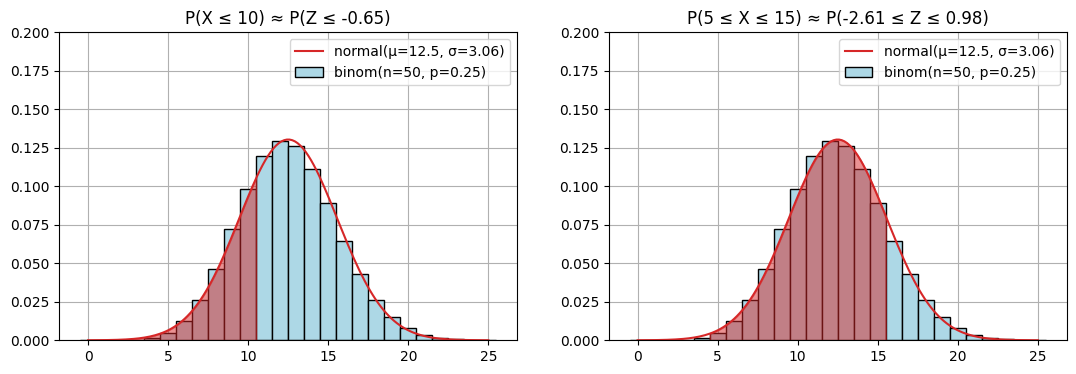

In [6]:
fig, axs = plt.subplots(1,2,figsize=(13,4))

xs = np.arange(0,26)
XS = np.linspace(0,25,150)

for ax in axs:
    ax.bar(
        xs, binom.pmf(xs, 50, 0.25), width=1,
        color='lightblue', edgecolor='k',
        label="binom(n=50, p=0.25)"
    )
    ax.plot(
        XS, norm.pdf(XS, 12.5, 3.06), color='tab:red',
        label="normal(μ=12.5, σ=3.06)"
    )
    ax.set(axisbelow=True, ylim=[0,0.2])
    ax.grid(); ax.legend()

XS = np.linspace(0,10.5,100)
axs[0].fill_between(
    XS, XS*0, norm.pdf(XS, 12.5, 3.06),
    color='tab:red', alpha=0.5
)
axs[0].set(title="P(X ≤ 10) ≈ P(Z ≤ -0.65)")

XS = np.linspace(4.5,15.5,100)
axs[1].fill_between(
    XS, XS*0, norm.pdf(XS, 12.5, 3.06),
    color='tab:red', alpha=0.5
)
axs[1].set(title="P(5 ≤ X ≤ 15) ≈ P(-2.61 ≤ Z ≤ 0.98)");

From the example and the figures, we can see that the uses of continuity correction ensure that the area under normal curve covered the entire width of the interesting bars in the probability histogram to account for the underestimation occurred from approximating discrete probability with continuous probability. If instead we want to exclude the bar(s) at the tailing ends, e.g. $P(X < 10)$ or $P(5 \le X < 15)$, then we needed to use the continuity correction $\pm 0.5$ to correctly exclude the entire bar. 

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Gamma & Exponential Distributions

The density curve corresponding to any normal distribution is bell-shaped and therefore symmetric. There are many practical situations in which the variable of interest to an investigator might have a *skewed distribution*. One family of distributions that has this property is the *gamma* family.

The **gamma distribution** derives its name from the well-known **gamma function**, studied in many areas of mathematics. Before we proceed to the gamma distribution, let us review this function and some of its important properties.

> The **gamma function** is defined as
> $$ \Gamma(\alpha) = \int_0^\infty x^{\alpha-1}e^{-x}\ dx \quad\text{for } \alpha > 0. $$

The following are a few simple properties of the gamma function.

1. For any $\alpha > 1$,
   $$ \Gamma(\alpha) = (\alpha-1) \cdot \Gamma(\alpha - 2) $$
    this can be derived via integration by part.

2. From the previous properties, for any positive integer $n$,
   $$ \Gamma(n) = (n-1)! $$


3. $\Gamma(1) = 1$ and $\Gamma(\frac{1}{2}) = \sqrt{\pi}$.

---

> The continuous random variable $X$ has a **gamma distribution**, with parameters $\alpha$ and $\beta$, if its density function is given by
> $$ 
f(x;\ \alpha, \beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha - 1}e^{-x/\beta} \quad\text{for } x > 0
$$
> and $f(x;\ \alpha, \beta) = 0$ elsewhere ($x \le 0$), given that $\alpha > 0$ and $\beta > 0$.

---

> The continuous random variable $X$ has an exponential distribution, with parameter $\beta$, if its density function is given by
> $$ f(x; \beta) = \frac{1}{\beta} e^{-x/\beta} \quad\text{for } x > 0$$
> and $f(x;\ \beta) = 0$ elsewhere ($x \le 0$), given that $\beta > 0$.

Graphs of several gamma distributions are shown in the following figure for certain specified values of the parameters $\alpha$ and $\beta$. The special gamma distribution for which $\alpha = 1$ is called the **exponential distribution**.

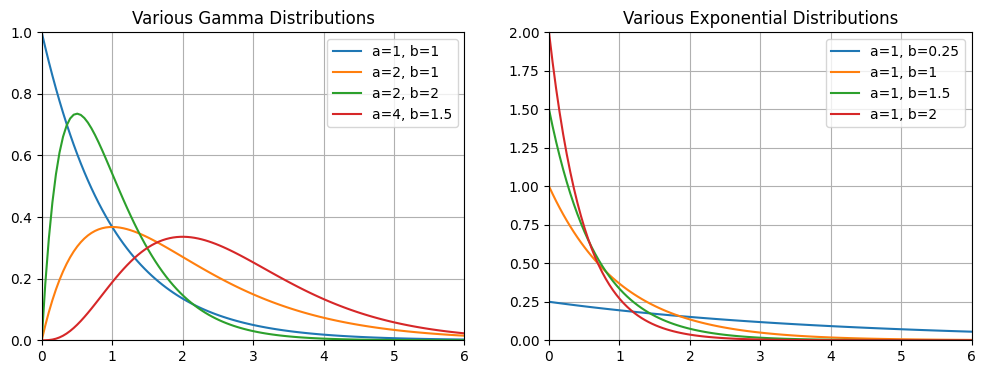

In [7]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

axs[0].set_title("Various Gamma Distributions")
axs[1].set_title("Various Exponential Distributions")

xs = np.linspace(0,6,120)

axs[0].plot(xs, gamma.pdf(xs, a=1, scale=1/1)  , label='a=1, b=1')
axs[0].plot(xs, gamma.pdf(xs, a=2, scale=1/1)  , label='a=2, b=1')
axs[0].plot(xs, gamma.pdf(xs, a=2, scale=1/2)  , label='a=2, b=2')
axs[0].plot(xs, gamma.pdf(xs, a=4, scale=1/1.5), label='a=4, b=1.5')

axs[1].plot(xs, gamma.pdf(xs, a=1, scale=1/0.25), label='a=1, b=0.25')
axs[1].plot(xs, gamma.pdf(xs, a=1, scale=1/1)   , label='a=1, b=1')
axs[1].plot(xs, gamma.pdf(xs, a=1, scale=1/1.5) , label='a=1, b=1.5')
axs[1].plot(xs, gamma.pdf(xs, a=1, scale=1/2)   , label='a=1, b=2')

for ax in axs:
    ax.set(xlim=[0,6], ylim=[0,1], axisbelow=True)
    ax.legend(); ax.grid()

axs[1].set(ylim=[0,2]);

Moreover, the gamma distributions with parameter $\beta = 1$ are called the **standard gamma distributions**, so the pdf of such distribution is given by

$$
f(x;\ \alpha) = \frac{x^{\alpha - 1} e^{-x}}{\Gamma(\alpha)} \quad\text{for } x > 0.
$$

---
<h3 style="color: green; font-size: 16pt;">Expected Value & Variance of Gamma and Exponential Distribution</h3>

> The mean and variance of the gamma distribution $f(x;\ \alpha, \beta)$ are
> $$ \mu = \alpha\beta \quad\text{and}\quad \sigma^2 = \alpha\beta^2 $$
> and so the mean and variance of the exponential distribution $f(x;\ \beta)$ are
> $$ \mu = \beta \quad\text{and}\quad \sigma^2 = \beta^2 $$

<span style="color: green;"><b><u>Example</u></b></span> Suppose the survival time $X$ in weeks of a randomly selected male mouse exposed
to 240 rads of gamma radiation has a gamma distribution with $\alpha = 8$ and $\beta = 15$. The expected survival time is $\mu = (8)(15) = 120$ weeks, whereas $\sigma^2 = (8)(15)^2 = 1800$ and $\sigma = \sqrt{1800} = 42.43$ weeks. 

The probability that a mouse survives between 60 and 120 weeks is

$$
\begin{align*}
P(60 \le X \le 120) &= \int_{60}^{120} f(x;\ 8, 15)\ dx \\
&= \int_{60}^{120} \frac{1}{15^8 \Gamma(8)}x^{8-1}e^{-x/15}\ dx \\
&= \frac{1}{15^8 \cdot 7!} \int_{60}^{120} x^7 e^{-x/15}\ dx
\end{align*}
$$

Now we need several integration by parts, skipping to the result, we have:

$$
P(60 \le X \le 120) \approx \frac{6.4 \times 10^{12}}{15^8 \cdot 7!} = 0.4955.
$$

The probability that a mouse survives at least 30 weeks is

$$
\begin{align*}
P(X \ge 30) &= 1 - P(X < 30) = 1 - P(X \le 30) \\
&= 1 - \frac{1}{15^8 7!} \int_{0}^{30} x^7 e^{-x/15}\ dx \\
&= 0.999.
\end{align*}
$$

We can see that the process of computing probabilities related to gamma distribution can be absurd, normally we do these things using computational software or via pre-computed table of cumulative distribution function or *incomplete gamma function*. (For an example table, see [Incomplete Gamma Function](https://eclass.aueb.gr/modules/document/file.php/STAT238/Table_Incomplete%20%28%CE%B5%CE%BB%CE%BB%CE%B9%CF%80%CE%AE%CF%82%29%20Gamma.pdf))

> _(Optional)_ Let $X$ have a gamma distribution with parameters $\alpha$ and $\beta$. Then for any $x > 0$, the **cdf** of $X$ is given by
> $$ P(X \le x) = \int_0^x f(y;\ \alpha, \beta)\ dy = F\left( \frac{x}{\beta};\ \alpha \right) $$
> where $F(t;\ \alpha)$ is the **incomplete gamma function** or the cdf of standard gamma rv defined as
> $$ F(t;\ \alpha) = \int_0^t \frac{y^{\alpha - 1}e^{-y}}{\Gamma(\alpha)}\ dy \quad\text{for } x > 0.$$

---
<h3 style="color: green; font-size: 16pt;">Applications of the Exponential and Gamma Distributions (Optional)</h3>

<h4 style="color: green;">Relationship to the Poisson Process of Exponential Distribution</h4>

The most important applications of the exponential distribution are situations where the **Poisson process** applies. Recall that the Poisson process allows for the use of the discrete Poisson distribution to compute the probability of specific *numbers of "events* during a particular "period of time" or "span of space." In many applications, *the time period or span of space is the random variable*. For example, an industrial engineer may be interested in modeling the time $T$ between arrivals at a congested intersection during rush hour in a large city. An arrival represents the Poisson event. 

The relationship between the exponential distribution and the Poisson process is quite simple. The Poisson distribution was developed as a single-parameter distribution with parameter $\lambda$, where $\lambda$ may be interpreted as the mean number of events per unit "time" or "space." 

Consider the random variable described by *the time required for the first event to occur*. Using the Poisson distribution, we find that the probability of no events occurring in the span up to time $t$ is given by

$$
p(0;\ \lambda t) = \frac{e^{-\lambda t} (\lambda t)^0}{0!} = e^{-\lambda t}.
$$

Let $X$ be the time to the first Poisson event. The probability that the length of time until the first event will exceed $x$ is the same as the probability that no Poisson events will occur in $x$. The latter, of course, is given by $e^{-\lambda t}$. As a result,

$$
P(X > x) = e^{-\lambda x}.
$$

Thus, the cdf of $X$ is given by

$$
P(X \le x) = 1 - P(X > x) = 1 - e^{-\lambda x}.
$$

Now, we differentiate the cdf above to obtain the pdf of $X$:

$$
P(0 \le X \le x) = \frac{d}{dx}P(X \le x) = \lambda e^{-\lambda x} \iff f(x) = \lambda e^{-\lambda x}. 
$$

which is the density function of the exponential distribution with $\beta = 1/\lambda$. So **the time to the first Poisson event (or the time between each Poisson event) $X$ is a exponential random variable**. And the parameter $\beta$ (the mean of exponential rv) is often called the **mean time between events**.

<span style="color: green;"><b><u>Example</u></b></span> Suppose that a system contains a certain type of component whose occurrences of failure conform Poisson distribution, and so the time, in years, to failure, given by the random variable $T$ is modeled nicely by the exponential distribution with mean time to failure $\beta = 5$. If 5 of these components are installed in different systems, what is the probability that at least 2 are still functioning at the end of 8 years?

The probability that a given component is still functioning after 8 years is given by

$$
P(T > 8) = \int_8^{\infty} \frac{1}{5}e^{-x/5}\ dx = e^{-8/5} \approx 0.2.
$$

Now, using this probability $p=0.2$ of a component surviving after 8 years, we can determined the probability that at least 2 out of 5 components survive after 8 years using the binomial distribution:

$$
P(X \le 2) = \sum_{x=2}^5 b(x;\ 5, 0.2) = B(5;\ 5, 0.2) - B(1;\ 5, 0.2) = 1 - 0.737 = 0.263.
$$

<h4 style="color: green;">The Memoryless Property and Its Effect on the Exponential Distribution</h4>

The types of applications of the exponential distribution are influenced by the **memoryless property** of the exponential distribution (which also holds for Poisson distribution). For example, in the case of, say, an electronic component where lifetime has an exponential distribution, the probability that the component lasts $t$ hours satisfies the condition

$$
P(X \ge t) = P(X \ge t_0 + t | X \ge t_0)
$$

So if the component "makes it" to $t_0$ hours, the probability of lasting an additional $t$ hours is the same as the probability of lasting $t$ hours. There is no "punishment" through wear that may have ensued for lasting the first $t_0$ hours. Thus, the exponential distribution is more appropriate when the memoryless property is justified. But if the failure of the component is a result of gradual or slow wear (as in mechanical wear), then the exponential does not apply and either the gamma, in such case, the Weibull distribution (which will be discuss later) may be more appropriate.

<h4 style="color: green;">Relationship to the Poisson Process of Gamma Distribution</h4>

Whereas the exponential distribution describes the time until the occurrence of a Poisson event (or the time between Poisson events), **the time (or space) occurring until a specified number of Poisson events occur** is a random variable whose density function is described by the gamma distribution. This specific number of events is the parameter $\alpha$ in the gamma density function. Thus, it becomes easy to understand that when $\alpha = 1$, the special case of the exponential distribution occurs.

<span style="color: green;"><b><u>Example</u></b></span> It is known, from previous data, that the length of time in months between customer complaints about a certain product is a gamma distribution with $\alpha = 2$ and $\beta = 4$. Changes were made to tighten quality control requirements. Following these changes, 20 months passed before the first complaint. Does it appear as if the quality control tightening was effective?

To answer this question, let's calculate the probability that the time before a complaint happening is 20 before the changes in quality control were made:

$$
\begin{align*}
P(X \le 20) = 1 - P(X < 20) &= 1 - F(20/4;\ 2) \\
&= 1 - F(5;\ 2) = 1 - 0.9600 = 0.04.
\end{align*}
$$

As a result, we can see that the chance that the time to complaint as large as 20 before the quality control tightening is only 4%, which is fairly small. Thus, it is reasonable to say that the quality control tightening was effective.

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Chi-Squared Distribution

Another very important distribution is a special case of the gamma distribution obtained by letting $\alpha = v/2$ and $\beta = 2$. The result is called the **chi-squared distribution**.

> The continuous random variable $X$ has a **chi-squared** distribution, with **$v$ degrees of freedom**, if its density function is given by
> $$ f(x;\ v) = \frac{1}{2^{v/2} \Gamma(v/2)}x^{(v/2)-1}e^{-x/2} \quad\text{for } x > 0 $$
> and $f(x;\ v) = 0$ otherwise (when $x \le 0$), where $v$ is a positive integer.

> The mean and variance of the chi-squared distribution are
> $$ \mu = v \quad\text{and}\quad \sigma^2 = 2v. $$

The chi-squared distribution plays a vital role in statistical inference. It has considerable applications in both methodology and theory. Topics dealing with sampling distributions, analysis of variance, and nonparametric statistics involve extensive use of the chi-squared distribution. We'll discuss this distribution in more detail in later chapters.

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>

## Additional Continuous Distribution (Optional) 

---
<h3 style="color: green; font-size: 16pt;">Weibull Distribution</h3>

Modern technology has enabled engineers to design many complicated systems whose operation and safety depend on the reliability of the various components making up the systems. For example, a fuse may burn out, a steel column may buckle, or a heat-sensing device may fail. Identical components subjected to identical environmental conditions will fail at different and unpredictable times. 

We have seen the role that the gamma and exponential distributions play in these types of problems. In later years, another distribution that has been used extensively to deal with such problems is the **Weibull distribution**, introduced by the Swedish physicist Waloddi Weibull in 1939.

> A random variable $X$ is said to have a **Weibull distribution** with parameters $\alpha$ and $\beta$ if the pdf of $X$ is
> $$ f(x;\ \alpha, \beta) = \frac{\alpha}{\beta^\alpha}x^{\alpha-1}e^{-(x/\beta)^\alpha} \quad\text{for } x \ge 0, $$
> and equal to 0 otherwise, where $\alpha, \beta > 0$.

When $\alpha = 1$, the pdf reduces to the exponential distribution, so the exponential distribution is a special case of both the gamma and Weibull distributions. However, there are gamma distributions that are not Weibull distributions and vice versa, so one family is not a subset of the other.

> The mean and the variance of a Weibull distribution with parameters $\alpha > 0$ and $\beta > 0$ are
> $$ \mu = \beta\cdot\Gamma\left( 1 + \frac{1}{\alpha} \right) 
\quad\text{and}\quad \
sigma^2 = \beta^2 \left\{ \Gamma\left( 1 + \frac{2}{\alpha} \right) - \left[ \Gamma\left( 1 + \frac{1}{\alpha} \right) \right]^2 \right\} 
$$

> The cdf of a Weibull rv having parameters $\alpha$ and $\beta$ is
> $$ F(x;\ \alpha, \beta) = \begin{cases}
    0 &x < 0 \\
    1 - e^{-(x/\beta)^\alpha} &x \ge 0
\end{cases}
$$

---
<h3 style="color: green; font-size: 16pt;">Lognormal Distribution</h3>

> A nonnegative rv $X$ is said to have a **lognormal distribution** if the rv $Y = \ln(X)$ has a normal distribution. The resulting pdf of a lognormal rv when $\ln(X)$ is normally distributed with parameters $\mu$ and $\sigma$ is
> $$ f(x;\ \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma x} e^{-[\ln(x) - \mu]^2 / (2\sigma^2)} \quad\text{for } x \ge 0, $$
> and is equal to 0 otherwise.

The parameters and are not the mean and standard deviation of $X$ but of $\ln(X)$.

> The mean and the variance of a Weibull distribution with parameters $\alpha > 0$ and $\beta > 0$ are
> $$ \mu = e^{\mu + \sigma^2/2} \quad\text{and}\quad \sigma^2 = e^{2\mu + \sigma^2/2} \cdot (e^{\sigma^2} - 1).
$$

Because $\ln(X)$ has a normal distribution, the cdf of $X$ can be expressed in terms of the cdf $\Phi(z)$ of a standard normal rv $Z$.

> The cdf of a lognormal rv having parameters $\mu$ and $\sigma$ is
> $$ F(x;\ \mu, \sigma) = \Phi\left( \frac{\ln(x) - \mu}{\sigma} \right) \quad\text{for } x \ge 0.$$

---
<h3 style="color: green; font-size: 16pt;">Beta Distribution</h3>

All families of continuous distributions discussed so far except for the uniform distribution have positive density over an infinite interval (though typically the density function decreases rapidly to zero beyond a few standard deviations from the mean). The beta distribution provides positive density only for $X$ in an interval of finite length.

> A random variable X is said to have a **beta distribution** with parameters $\alpha$, $\beta$ (both positive), $A$, and $B$ if the pdf of $X$ is
> $$ f(x;\ \alpha, \beta, A, B) = \frac{1}{B - A}\cdot\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \left( \frac{x-A}{B-A} \right)^{\alpha-1}  \left( \frac{B-x}{B-A} \right)^{\beta-1} \quad\text{for } A \le x ]le B,$$
> and is equal to 0 otherwise. The special case where $A = 0$ and $B = 1$ gives the **standard beta distribution**.
> $$ f(x;\ \alpha, \beta, 0, 1) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} (x-1)^{\alpha-1}  (1-x)^{\beta-1}. $$

Moreover, the uniform distribution on $(0, 1)$ is a special case of standard beta distribution when the parameters are $\alpha = 1$ and $\beta = 1$.

> The mean and the variance of a beta distribution with parameters $\alpha$, $\beta$, $A$, and $B$ are
> $$ \mu = A + (B-A)\frac{\alpha}{\alpha+\beta} \quad\text{and}\quad \sigma^2 = \frac{(B-A)^2\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}. $$

<div style="widht:100%; height:20px; background-color:darkorchid;"></div>